In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

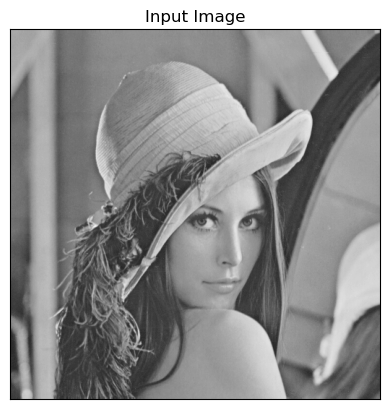

In [3]:
im = cv2.imread('lena.png', 0)

show_image(im, 'Input Image')

In [4]:
def convolve(image, kernel):
    k_h, k_w = kernel.shape
    i_h, i_w = image.shape

    k_ch, k_cw = k_h // 2, k_w // 2

    new_image = np.zeros_like(image)

    padded_img = np.zeros((i_h + k_ch * 2, i_w + k_cw * 2))
    padded_img[k_ch: -k_ch, k_cw: -k_cw] = image

    for i in range(i_h):
        for j in range(i_w):
            subimage = padded_img[i: i+k_h, j: j+k_w]

            new_image[i, j] = np.sum(np.multiply(subimage, kernel))

    return new_image

In [5]:
def box_filter(img, ksize):
    img = np.array(img)
    kernel = np.ones((ksize, ksize)) / ksize ** 2
    out_img = convolve(img, kernel)
    return out_img

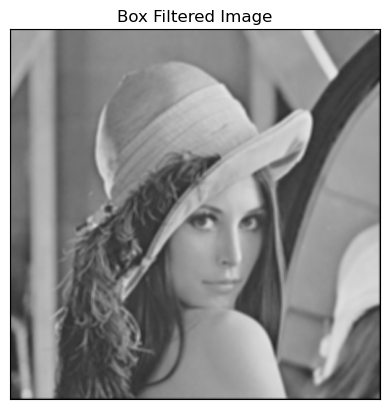

In [6]:
box = box_filter(im, 5)

show_image(box, 'Box Filtered Image')

In [7]:
def gaussian_filter(img, ksize, sigma=1):
    img = np.array(img)
    kernel = np.zeros((ksize, ksize))
    c = ksize // 2
    for i in range(ksize):
        for j in range(ksize):
            u = i - c
            v = j - c
            val = (1 / (2 * np.pi * sigma ** 2)) * np.exp(- (u ** 2 + v ** 2) / (2 * sigma ** 2))
            kernel[i, j] = val
    kernel = kernel / np.sum(kernel)
    out_img = convolve(img, kernel)
    return out_img

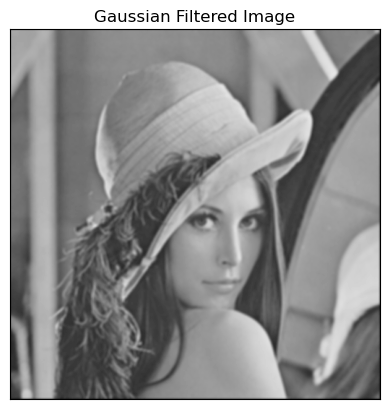

In [8]:
gaussian = gaussian_filter(im, 5, 2)

show_image(gaussian, 'Gaussian Filtered Image')

In [9]:
def median_filtering(img, ksize):
    img = np.array(img)
    r, c = img.shape

    center = ksize // 2

    out_img = np.zeros_like(img)
    padded_img = np.zeros((r + center * 2, c + center * 2))
    padded_img[center: -center, center: -center] = img

    for i in range(r):
        for j in range(c):
            subimage = padded_img[i: i+ksize, j: j+ksize]

            out_img[i, j] = np.median(subimage.ravel())

    return out_img

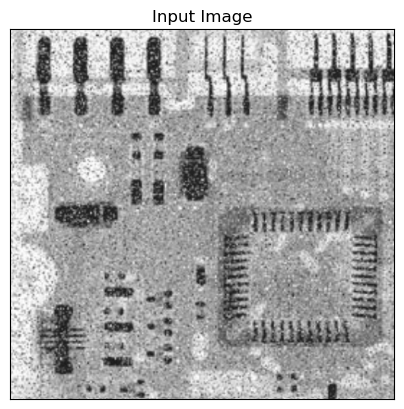

In [10]:
im = cv2.imread('saltpeppernoise.png', 0)

show_image(im, 'Input Image')

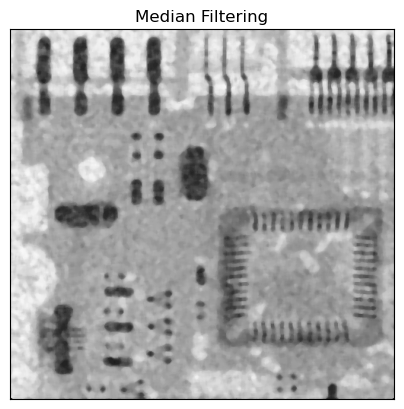

In [11]:
median = median_filtering(im, 7)

show_image(median, 'Median Filtering')